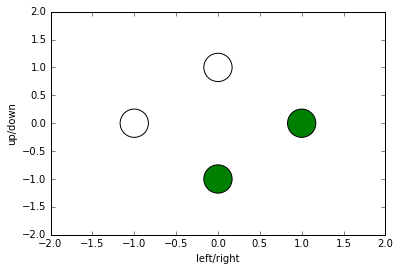

TypeError: 'NoneType' object is not iterable

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import display



sc_fct = 1.1             
min_neigh = 5              
min_size_f = (30,30)      
min_size_e = (10,10)      
global col
col=['w','w','w','w']

def calc_mean(matr):
    cont=0
    a=0
    b=0
    for i in range(0,ew):
        for j in range(0,eh):
            if mask[i][j]==255:
                a=a+i;
                b=b+j;
                cont=cont+1;
    if cont>0:
        c=float(a/cont)
        d=float(b/cont)
        return c,d

def leds_on(x_m,y_m,ew,eh):
    if (x_m>ew/2):
        col[3]='g'
        col[0]='w'
    else:
        col[0]='g'
        col[3]='w'
    if (y_m>eh/2):
        col[2]='g'
        col[1]='w'
    else:
        col[1]='g'
        col[2]='w'
    
    
    
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eyeCascade=cv2.CascadeClassifier("haarcascade_eye.xml")


video_capture = cv2.VideoCapture(0)
cv2.namedWindow("Face and eyes")

while True:
    
    ret, frame = video_capture.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(       
        gray,
        scaleFactor=sc_fct,
        minNeighbors=min_neigh,
        minSize=min_size_f
        )

    
 
    for (x, y, w, h) in faces:
            cv2.rectangle(frame,(x, y), (x+w, y+h), (0, 255, 0), 2)
            
            roi_gray=gray[y:y+h/2,x:x+w]
            roi_color=frame[y:y+h/2,x:x+w]
            
            
            
            eyes= eyeCascade.detectMultiScale(         
                roi_gray,
                scaleFactor=sc_fct,
                minNeighbors=min_neigh,
                minSize=min_size_e
                )
            
            for (ex, ey, ew, eh) in eyes:
                    cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 191, 0), 2)
                 
                
                    roi_gray2=roi_gray[ey:ey+eh,ex:ex+ew]
                
                    lower=np.array([0])
                    upper=np.array([80])
                
                    mask = cv2.inRange(roi_gray2, lower, upper)
                    
                    cv2.imshow('mask',mask)
                        
                    x_m,y_m=calc_mean(mask)
                    leds_on(x_m,y_m,ew,eh)
                    
    display.clear_output(wait=True)               
    plt.scatter([-1,0,0,1],[0,1,-1,0],s=800,c=col)
    plt.axis([-2,2,-2,2])
    plt.xlabel('left/right')
    plt.ylabel('up/down')
    plt.show()   
    cv2.imshow("Face and eyes", frame)
                
                
                
    if cv2.waitKey(1)==27:
        break
              
            

video_capture.release()
cv2.destroyAllWindows()